In [57]:
import numpy as np
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA, ARIMA
from model_builder import arima_model, model_plotter
from matplotlib import pyplot as plt
from collections import Counter
from model_builder import stationarity_test, arima_model
from criteria_housing import name_zipcode_area
from model_builder import dataframe_cleaner
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
#setting display options 

pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_columns', 500)

In [6]:
zillow_df = pd.read_csv('../write_data/zipcodes_all_price.csv',
                        index_col = 0, parse_dates = True)

zillow_df.columns = pd.to_numeric(zillow_df.columns)

#filtering out dataframes with null values
print('old top_df containing null columns:', 
      len([col for col in zillow_df if zillow_df[col].isnull().sum()>0]))
zillow_df = dataframe_cleaner(zillow_df)

print('cleaned top_df containing null columns:', 
      len([col for col in zillow_df if zillow_df[col].isnull().sum()>0]) )

old top_df containing null columns: 1039
cleaned top_df containing null columns: 0


In [113]:
zillow_df.tail()

,60657,75070,77494,60614,79936,77084,10467,60640,77449,94109,11226,32162,11375,11235,37013,90250,60647,37211,78660,60618,10128,77573,77584,28269,79912,78572,94565,30349,20002,90046,78130,78613,20009,75052,10462,37042,77429,63376,60613,77479,30044,73099,77036,77433,10463,11230,60629,11209,60625,30043,75034,11212,75287,28277,85032,7030,11214,21234,33160,78521,23464,77077,94501,30096,78704,98052,77379,75243,11221,78245,11229,8701,60619,90034,94110,78666,30024,60610,44107,75067,33025,33411,33139,11377,90044,48197,2169,23462,90805,66062,44035,95630,90650,11234,92683,85710,78745,11355,10314,30281,32210,37075,94558,11215,90026,85225,91910,87111,28027,6010,78240,87114,89108,85308,11211,17603,93722,80134,48180,85281,78577,94533,15601,95608,43081,44060,80013,33024,20906,33009,90066,43123,97229,76028,91709,11385,85364,11373,14850,65807,98012,77459,92677,95823,33908,44256,2148,60620,27410,45011,76063,33647,92804,60634,8753,65203,47906,98103,92345,75228,92126,90019,43130,27406,60016,46307,76244,28314,27610,89121,29732,75056,30040,30188,79938,92336,99301,20011,77095,91911,77845,92503,94536,7002,27587,21740,11233,7302,90280,22191,19111,89117,87120,43230,40475,46227,11236,91730,23320,74012,90201,92592,32244,21117,92109,34787,77450,92101,32822,30080,7093,60626,90004,28078,34135,90706,48103,30062,33186,30052,30041,75217,33012,30331,11372,32256,34711,60649,92335,37130,23454,38401,92021,48185,93065,91342,44130,95747,32218,95123,43026,20019,22193,45840,80634,2155,92627,85705,20878,30022,...,61741,47451,47649,83813,38379,47940,50056,47941,55710,80105,16738,14418,55910,3442,12029,47166,49625,1354,3464,62573,3227,48897,49814,55991,1098,25202,12485,42441,47234,61776,54864,61232,62638,20779,64444,53577,61728,8319,15673,96142,14804,44093,1011,6027,62218,84328,56382,67001,3084,3230,13026,42436,45889,46985,22713,46165,48761,61747,3777,18915,55924,3583,12726,23433,54921,31829,98645,45881,62048,61841,43540,49318,8006,1092,11958,55324,55722,62338,43432,68523,2812,37688,80827,56569,12959,37118,12513,10518,12423,14008,13807,11739,21645,8328,59846,1245,3846,56570,13028,61870,3816,1008,38560,6796,53911,45339,3745,21521,46764,62545,13334,61912,13061,61230,15015,46913,96141,3854,10964,14728,43456,61038,14506,47541,62539,24530,38362,98358,3268,80819,99123,92339,1366,62094,3450,54007,20609,65046,12836,61847,23039,1026,24059,3241,38361,56181,79366,33924,49102,50530,95629,60512,61420,3590,83803,61859,92333,55753,37369,50162,20693,61931,49322,49724,98351,10501,16836,1368,53550,46987,56176,56314,61488,95636,8317,12824,21662,3853,3605,43445,50106,61733,94970,21671,87540,12175,49716,8241,3740,3875,21869,17006,21657,6090,52728,55065,25843,20674,97011,98279,56578,12153,61572,15083,52341,49725,98940,45326,91008,4066,80515,98925,43525,80428,96148,28611,93517,28775,80456,1255,3457,3284,95728,28757,95497,12156,97149,77457,80481,20625,20618,80510,49710,1270,12480,29915,92322,3812,89413,92341,3765,84781,12429,97028,12720,1338,3293,40404,81225,89155
Date_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-01,1018700.0,316600.0,321200.0,1299000.0,120300.0,162800.0,414300.0,777900.0,172300.0,3778700.0,887800.0,247100.0,1088800.0,799700.0,203800.0,601300.0,470600.0,253900.0,239400.0,457900.0,7342700.0,253100.0,251400.0,193500.0,184700.0,100100.0,410900.0,124600.0,678200.0,1922100.0,215500.0,296200.0,1055400.0,194300.0,443900.0,127000.0,241300.0,190000.0,1041300.0,365000.0,178500.0,160000.0,177700.0,249200.0,726900.0,1102400.0,162600.0,1018900.0,463100.0,223700.0,423000.0,414900.0,326700.0,357900.0,261900.0,1853500.0,826300.0,1964

In [20]:
#Zip codes with average prices in the past year less than the 70% of the overall 
#average price in 23y

Counter(zillow_df.iloc[-24:].mean() < 0.70*(zillow_df.mean()))

Counter({False: 13676, True: 8})

In [24]:
tanking_columns = []
for col in zillow_df:
    if zillow_df[col].iloc[-24:].mean() < 0.70*(zillow_df[col].mean()):
        tanking_columns.append(col)

In [131]:
county_name = ['Cuyahoga', 'Mercer', 'Genesee#01', 'Genesee#02', 'Trenton']

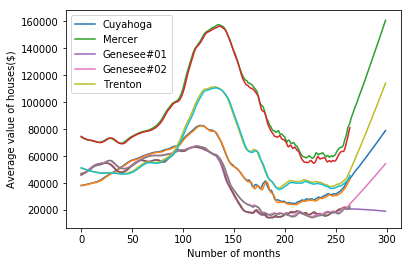

In [134]:
for col, county in zip(tanking_columns[:5], county_name):

    model = arima_model(zillow_df[col])
    forcast= model.predict(1, 300, typ='levels')
    forcast_dollars= model.predict(1, 300, typ='levels')
    plt.plot(zillow_df[col][0] + np.cumsum(forcast_dollars), label=f'{county}')
    plt.plot(zillow_df[col].values)
    plt.legend(loc='best')
    plt.xlabel('Number of months')
    plt.ylabel('Average value of houses($)')
    

In [68]:
#loading state, county and region details for our data
region_df = pd.read_csv('../write_data/regions_zipcode.csv', index_col=0)

In [ ]:
# Mercer county (08618), new jersey
# is among the highest income counties in the united states
#is home to princeton university where over 50% of the population are in the prime age
#18-45

In [114]:
def predict_dollars(data):
    """This function takes in a pandas
        series"""
    model = arima_model(data)
    forcast= model.predict(1, 300, typ='levels')
    forcast_pred = model.predict(264, 280, typ='levels')
    forcast_dollars = data[0] + np.cumsum(forcast_pred)
    return forcast_dollars[-1]

In [116]:
return_dollars = []
for zipcode in tanking_columns[:5]:
    return_dollars.append(predict_dollars(zillow_df[zipcode]))
    

In [123]:
for roi, zipcode in zip(return_dollars, tanking_columns[:5]):
    print(round(roi), ':' , zipcode)

54173.0 : 44102
110127.0 : 8618
45450.0 : 48506
61411.0 : 48503
81113.0 : 8611


In [ ]:
zillow_returns = {'Cuyahoga_Z': 47700, 'Mercer_Z': 171000, 
                  'Genesee#01_Z': 25600, 'Genesee#02_Z': 26300, 'Trenton_Z': 55400}

model_returns = {'Cuyahoga': 54173, 'Mercer': 110127, 
                  'Genesee#01': 45450, 'Genesee#02': 61411, 'Trenton': 81113}

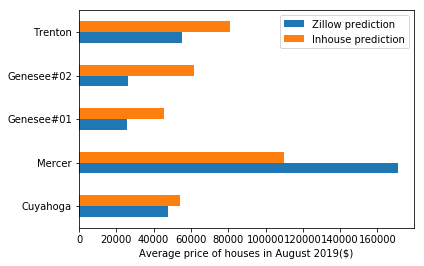

In [204]:
zillow = {'Cuyahoga': 47700, 'Mercer': 171000, 
                  'Genesee#01': 25600, 'Genesee#02': 26300, 'Trenton': 55400}

model = {'Cuyahoga': 54173, 'Mercer': 110127, 
                  'Genesee#01': 45450, 'Genesee#02': 61411, 'Trenton': 81113}
d = {
    'Zillow prediction': zillow,
    'Inhouse prediction': model,

}
pd.DataFrame(d).plot(kind='barh')
plt.xlabel('Average price of houses in August 2019($)')
plt.show()


Text(0.5, 1.0, 'Trenton Housing Price and Prediction to 2020')

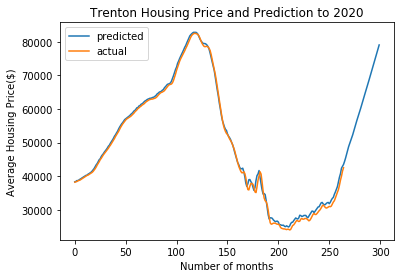

In [203]:
##Cleveland

model = arima_model(zillow_df[44102])
forcast= model.predict(1, 300, typ='levels')
forcast_dollars= model.predict(1, 300, typ='levels')
plt.plot(zillow_df[44102][0] + np.cumsum(forcast_dollars), label='predicted')
plt.plot(zillow_df[44102].values, label = 'actual')
plt.xlabel('Number of months')
plt.ylabel('Average Housing Price($)')
plt.legend(loc ='best')
plt.title('Trenton Housing Price and Prediction to 2020')


In [169]:
def returns_2ydollars(data,  price_now):
    """This function takes in a pandas
        series and amount of dollars return"""
    model = arima_model(data)
    forcast= model.predict(1, 300, typ='levels')
    forcast_pred = model.predict(264, 306, typ='levels')
    forcast_dollars = data[0] + np.cumsum(forcast_pred)
    
    return forcast_dollars[-1]-price_now
    

In [194]:
price_may = [46300, 166000, 22300, 24600, 48300]

In [193]:
tanking_columns[:5]

[44102, 8618, 48506, 48503, 8611]

In [196]:
dollars_2years = []
for zipcode, ret in zip(tanking_columns[:5], price_may):
    dollars_2years.append(returns_2ydollars(zillow_df[zipcode],ret))
dollars_2years

[34973.15247438084,
 2056.261859440099,
 21333.694846781116,
 59733.80154527622,
 83239.3182351467]

In [192]:
zillow_returns.values()

dict_values([47700, 171000, 25600, 26300, 55400])

Text(0.5, 0, 'ROI in 2 years ($)')

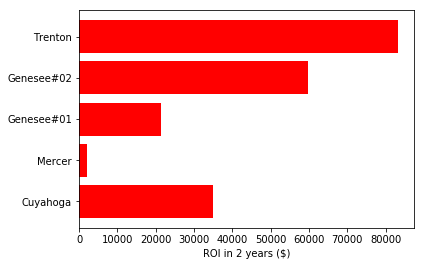

In [197]:
plt.barh([i for i in model_returns], [j for j in dollars_2years],color='red')
plt.xlabel('ROI in 2 years ($)')

In [184]:
name_zipcode_area(region_df, tanking_columns[:5]).reset_index(drop=True).rename(columns={'RegionName':'Zipcode'})

,RegionID,Zipcode,City,State,Metro,CountyName
0,77002,44102,Cleveland,OH,Cleveland,Cuyahoga
1,61129,8618,Trenton,NJ,Trenton,Mercer
2,79247,48506,Flint,MI,Flint,Genesee
3,79244,48503,Flint,MI,Flint,Genesee
4,61128,8611,Trenton,NJ,Trenton,Mercer


In [150]:
fig, ax = plt.subplots()



for ax, data in zip(axs.flatten(), league_sqrt_goldif.values()):
    ax.barh(data['club'], data['sqrt_gol_dif'])

Text(0.5, 0, 'Average price of houses in August 2019')

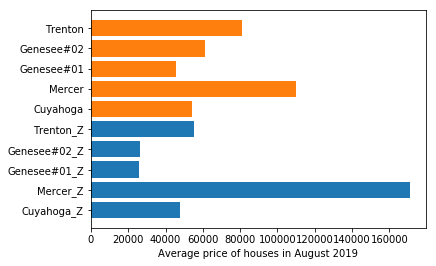

In [162]:
plt.barh([i for i in zillow_returns], [j for j in zillow_returns.values()])
plt.barh([i for i in model_returns], [j for j in model_returns.values()])
plt.xlabel('Average price of houses in August 2019')